## Data Engineering on GitHub Fluence-related Repositories

In [18]:
project_root_path = '../../../'
import sys

jupyter_lib_path = project_root_path + "jupyter/lib"
sys.path.append(jupyter_lib_path)
import commit_stat_engineering

### Read in the commit-stat.log.json files derived from each of the repositories

In [4]:
import json

dataset_dir = project_root_path + '/data/github/2022-04-07-marine-search'
project_stats_dir = dataset_dir + '/projects'
all_commit_logs = commit_stat_engineering.find_files('commit-stat.log.json', project_stats_dir)
all_stats = commit_stat_engineering.get_stats_for_all_commits(all_commit_logs)

### Here's an example of the data points loaded

In [13]:
all_stats[0].keys()


dict_keys(['commit', 'totalFiles', 'binFiles', 'textFiles', 'textLines', 'javascriptFiles', 'javascriptLines', 'javascriptFilePct', 'javascriptLinePct', 'rustFiles', 'rustLines', 'rustFilePct', 'rustLinePct', 'markdownFiles', 'markdownLines', 'markdownFilePct', 'markdownLinePct', 'jsonFiles', 'jsonLines', 'jsonFilePct', 'jsonLinePct', 'imgFiles', 'imgFilePct', 'lockFiles', 'lockLines', 'lockFilePct', 'lockLinePct', 'yarnFiles', 'yarnLines', 'yarnFilePct', 'yarnLinePct', 'htmlFiles', 'htmlLines', 'htmlFilePct', 'htmlLinePct', 'clojureFiles', 'clojureLines', 'clojureFilePct', 'clojureLinePct', 'shellFiles', 'shellLines', 'shellFilePct', 'shellLinePct', 'gitignoreFiles', 'gitignoreLines', 'gitignoreFilePct', 'gitignoreLinePct', 'noextbinFiles', 'noextbinFilePct', 'noexttextFiles', 'noexttextLines', 'noexttextFilePct', 'noexttextLinePct'])

### Histogram of the number of files included in a single commit:

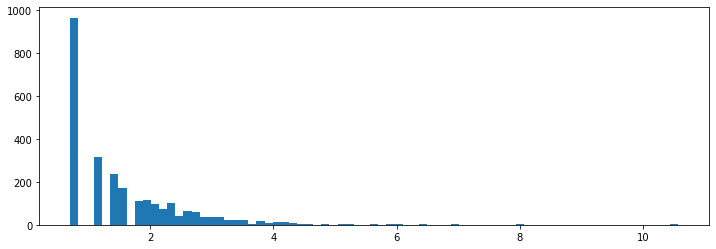

In [6]:
import matplotlib.pyplot as plt
import numpy as np

total_file_observations = [np.log1p(commit_stats['totalFiles']) for commit_stats in all_stats]
plt.figure(figsize=(12, 4))
plt.hist(total_file_observations, 75)
plt.show()

### Histogram of # of Rust lines per commit

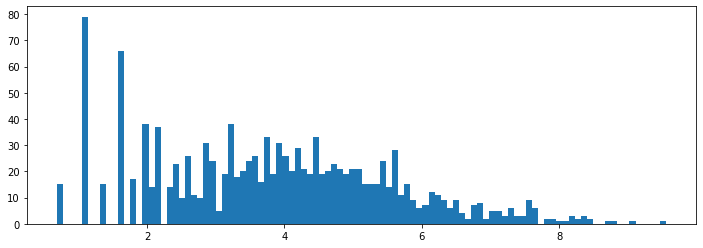

In [7]:
rust_commits = [commit for commit in all_stats if commit['rustLines'] > 0]

total_rust_lines = [
    np.log1p(commit_stats['rustLines']) 
    for commit_stats 
     in rust_commits 
]

plt.figure(figsize=(12, 4))
plt.hist(total_rust_lines, 100)

plt.show()

### Tool for printing both Histogram and Scatter Plot for each of the data points

In [8]:
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def printHistAndScatterPlot( dataset_id, suffix, description ):
    histogram_data_set = [
        np.log1p(commit_stats[dataset_id+suffix])
        for commit_stats 
        in all_stats if commit_stats[dataset_id+suffix] > 0
    ]
    scatter_data_set = [
        np.log1p(commit_stats[dataset_id+suffix])
        for commit_stats
         in all_stats
    ]

    #X = np.reshape(scatter_data_set, (-1, 1)) 
    #Y = np.reshape(total_file_observations, (-1,1))
    display(Markdown('### Analysis of '+dataset_id+' text lines found:\n'+description))
    fig, axs = plt.subplots(1, 2, figsize=(14,5))
    axs[0].hist(histogram_data_set, 150)
    axs[0].set_title( dataset_id+' histogram' )
    axs[1].scatter(scatter_data_set,total_file_observations, 6)
    axs[1].set_title( dataset_id+' scatterplot' )
    #axs[1].plot( X, LinearRegression().fit(X, Y).predict(X), 'Orange' ) 
    plt.show()


# Histogram and ScatterPlot Analysis
#### Many modern projects start out with a bulk check-in of multiple artifacts that were originally part of a cloneable template that does not directly reflect a developer's original code or skill set.
#### Our objective is to divide commits into different categories using the total number of files checked in as one axis and the number of lines of various file types as the other axis.

### Analysis of rust text lines found:
Rust shows a Gaussian distribution in this histogram.
The scatter plot shows positive correlation between the number of files checked in and the number of lines of Rust code.

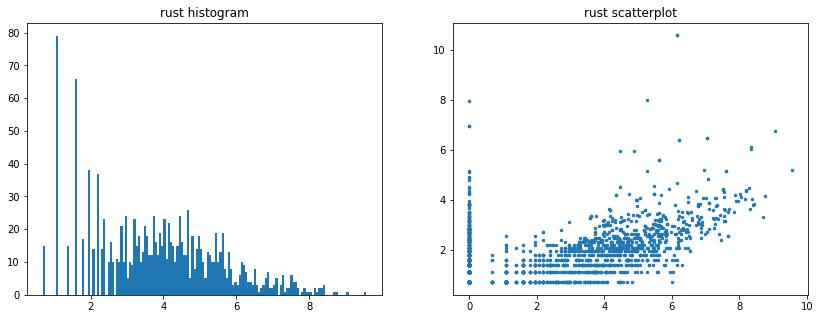

### Analysis of json text lines found:
JSON shows a gap on both histogram and scatter plot.  I think that this is due to the variety in usage of the JSON data storage/transfer protocol.

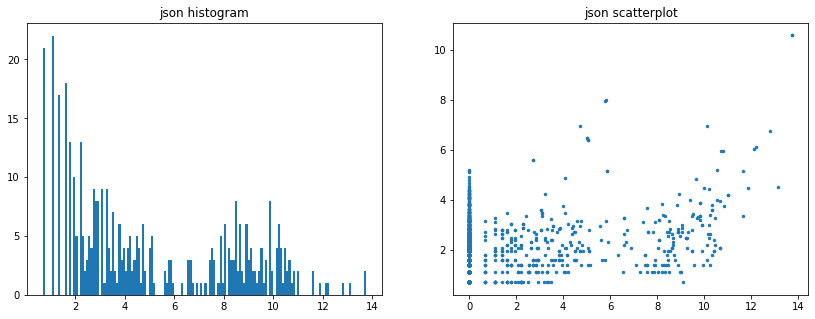

### Analysis of javascript text lines found:
JavaScript shows a stronger normal distribution and more positive correlation than JSON.  One outlier throws off the graph range to some extent.

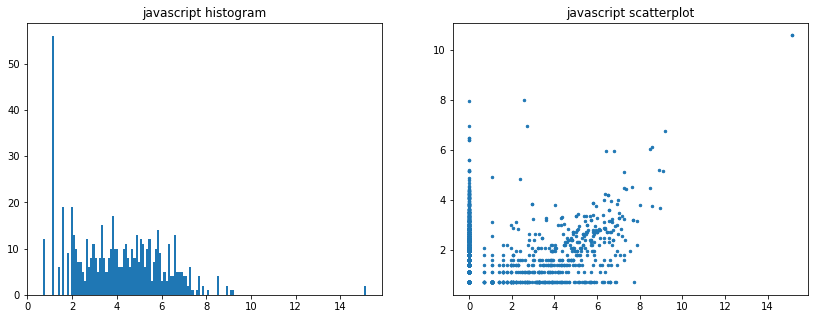

### Analysis of markdown text lines found:
From the histogram we see fairly normal distribution for markdown (.md) files.  The scatter plot appears less supportive of positive correlation at this point.

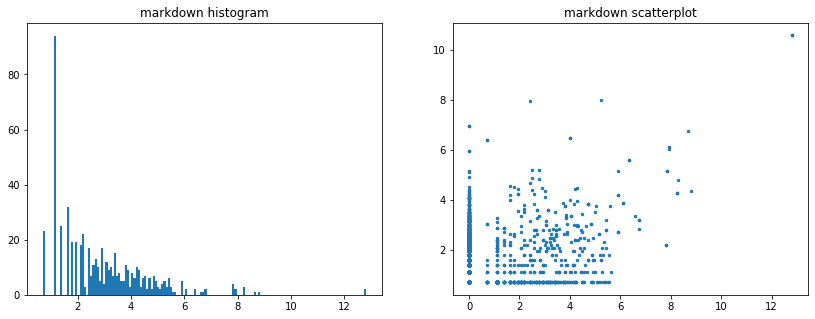

### Analysis of html text lines found:
HTML appears to be a stronger contendant for both distribution and direct correlation.

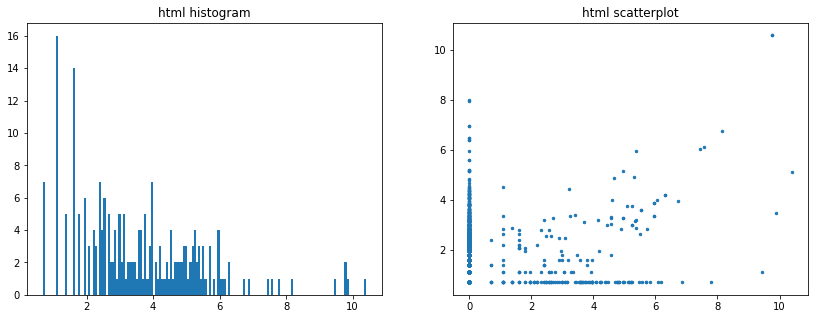

### Analysis of lock text lines found:
Within our selective data set, the number of lines in .lock files appears to have a strong correlation with the number of files committed.

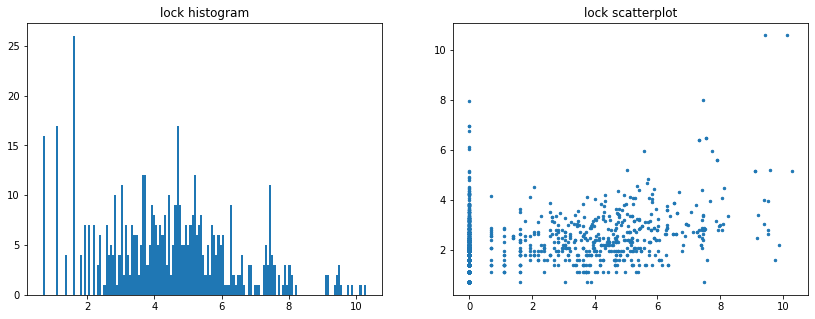

### Analysis of yarn text lines found:
Yarn is a good example of nearly zero correlation and can thusly be excluded from usage in later analysis.

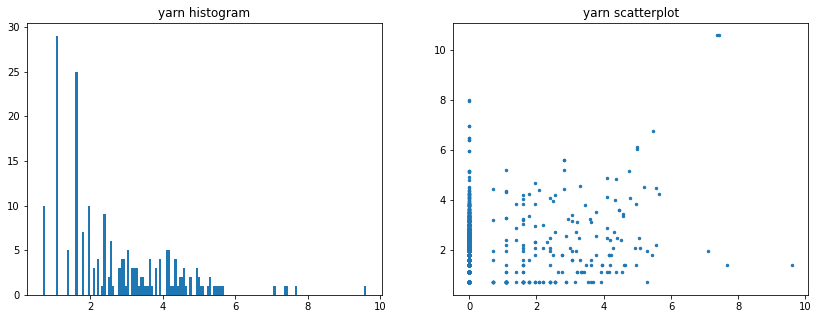

In [9]:
datasetNameAndObservation = json.load(open('./descriptorMap.txt', 'r'))
for dataset_id in datasetNameAndObservation: printHistAndScatterPlot(dataset_id, 'Lines', datasetNameAndObservation[dataset_id])